In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Car_data.csv")

In [3]:
df.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [4]:
df.describe()

,ID,Year,Mileage,Price
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2006.03409,99819.395000,42534.519370
std,28867.657797,9.52722,57710.087058,21632.296692
min,1.000000,1990.00000,2.000000,5000.000000
25%,25000.750000,1998.00000,49996.250000,23826.750000
50%,50000.500000,2006.00000,99807.000000,42563.500000
75%,75000.250000,2014.00000,149841.250000,61197.500000
max,100000.000000,2022.00000,199998.000000,80000.000000


In [5]:
df.shape

(100000, 8)

In [6]:
df.isna().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [7]:
df.drop("ID", axis = 1, inplace = True)

In [8]:
cats = ["Brand", "Model", "Color", "Condition"]

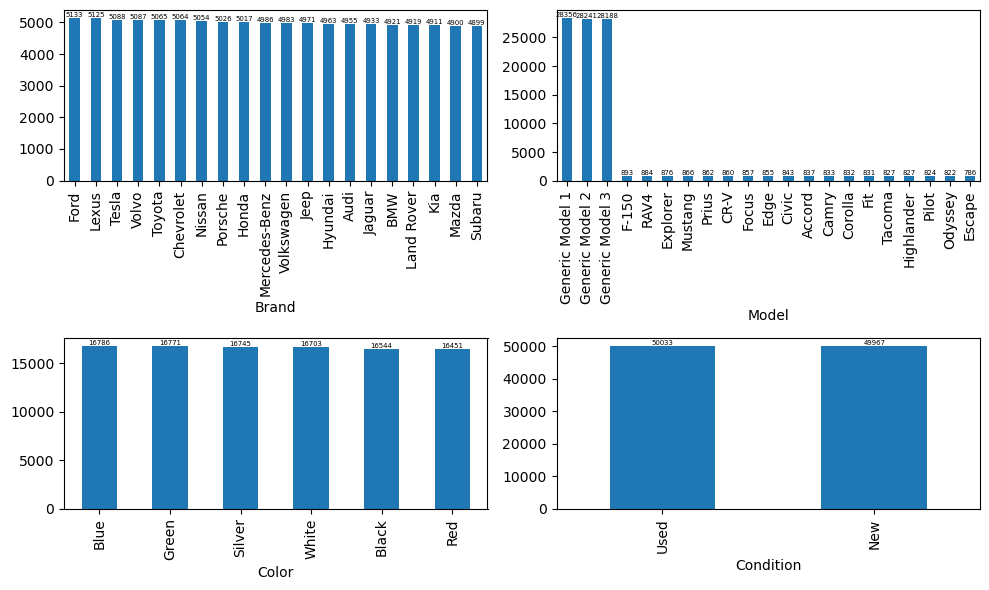

In [9]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
index = 0
for i in range(2):
    for j in range(2):
        counts = df[cats[index]].value_counts()
        counts.plot(kind = "bar", ax = axis[i][j])
        for container in axis[i][j].containers:
            axis[i][j].bar_label(container, size = 5)
        index += 1
plt.tight_layout()
plt.show()

In [10]:
a = df[cats[0]].value_counts()
a

Brand
Ford             5133
Lexus            5125
Tesla            5088
Volvo            5087
Toyota           5065
Chevrolet        5064
Nissan           5054
Porsche          5026
Honda            5017
Mercedes-Benz    4986
Volkswagen       4983
Jeep             4971
Hyundai          4963
Audi             4955
Jaguar           4933
BMW              4921
Land Rover       4919
Kia              4911
Mazda            4900
Subaru           4899
Name: count, dtype: int64

What is meant by "axes[i][j].containers"?

In the given code snippet, `axes[i][j].containers` refers to the containers that hold the bars in a bar plot created using Matplotlib. The variable `axes` is a 2x2 array of subplot axes, and during each iteration of the nested loop, the code creates a bar plot for a categorical variable using `df[cats[index]].value_counts().plot(kind="bar", ax=axes[i][j])`.

Each bar in a bar plot is contained within a "container," and `axes[i][j].containers` is used to access these containers for the purpose of labeling the bars in the plot.

Here's a breakdown of how it's used in the code:

- `axes[i][j]`: Accessing the specific subplot axis at the ith row and jth column.
- `axes[i][j].containers`: Accessing the containers holding the bars in the bar plot on that specific axis.

The code then uses `axes[i][j].bar_label(container, size=5)` to label each bar in the bar plot with its count. The `bar_label` method is part of Matplotlib's functionality to label bars in a bar plot.

In summary, `axes[i][j].containers` is a way to access the containers of the bars within a specific subplot axis in order to manipulate or label them.

In [11]:
for i in range(len(cats)-1):
    for j in range(i+1, len(cats)):
        if cats[i] != "Model" and cats[j] != "Model":
            print(pd.crosstab(df[cats[i]], df[cats[j]]))

Color          Black  Blue  Green  Red  Silver  White
Brand                                                
Audi             857   811    836  794     791    866
BMW              827   809    811  836     819    819
Chevrolet        809   872    823  859     860    841
Ford             869   854    847  862     866    835
Honda            859   833    802  850     850    823
Hyundai          795   841    863  794     862    808
Jaguar           827   862    847  792     791    814
Jeep             808   812    866  796     858    831
Kia              841   815    804  806     835    810
Land Rover       785   808    883  817     825    801
Lexus            873   862    895  818     824    853
Mazda            817   827    829  819     791    817
Mercedes-Benz    802   851    821  846     829    837
Nissan           816   832    857  784     915    850
Porsche          839   859    825  843     806    854
Subaru           801   813    782  843     871    789
Tesla            835   859  

<Axes: xlabel='Brand'>

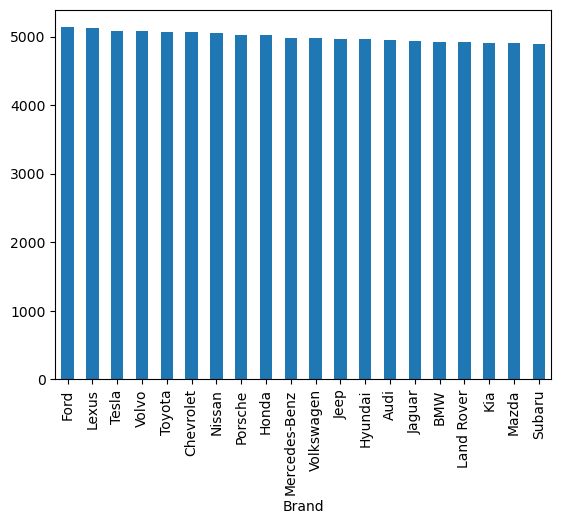

In [12]:
a.plot(kind = "bar")

In [13]:
nums = ["Mileage", "Price"]

In [14]:
group = df.groupby("Model")
group["Price"].mean()

Model
Accord             41336.017921
CR-V               41624.132558
Camry              44123.025210
Civic              42600.956109
Corolla            42389.441106
Edge               41828.156725
Escape             41196.947837
Explorer           42061.461187
F-150              42819.447928
Fit                42123.930205
Focus              41872.891482
Generic Model 1    42540.365778
Generic Model 2    42630.172161
Generic Model 3    42624.893572
Highlander         41682.413543
Mustang            42196.379908
Odyssey            42397.378345
Pilot              41627.684466
Prius              41341.024362
RAV4               43335.950226
Tacoma             42551.721886
Name: Price, dtype: float64

In [15]:
def plots(df, name, nums, ax):
    group = df.groupby(name)
    mean = group[nums].mean()
    sns.barplot(x = mean.index, y = mean, ax = ax)
    for container in ax.containers:
        ax.bar_label(container, label_type = "center", rotation = 90)
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

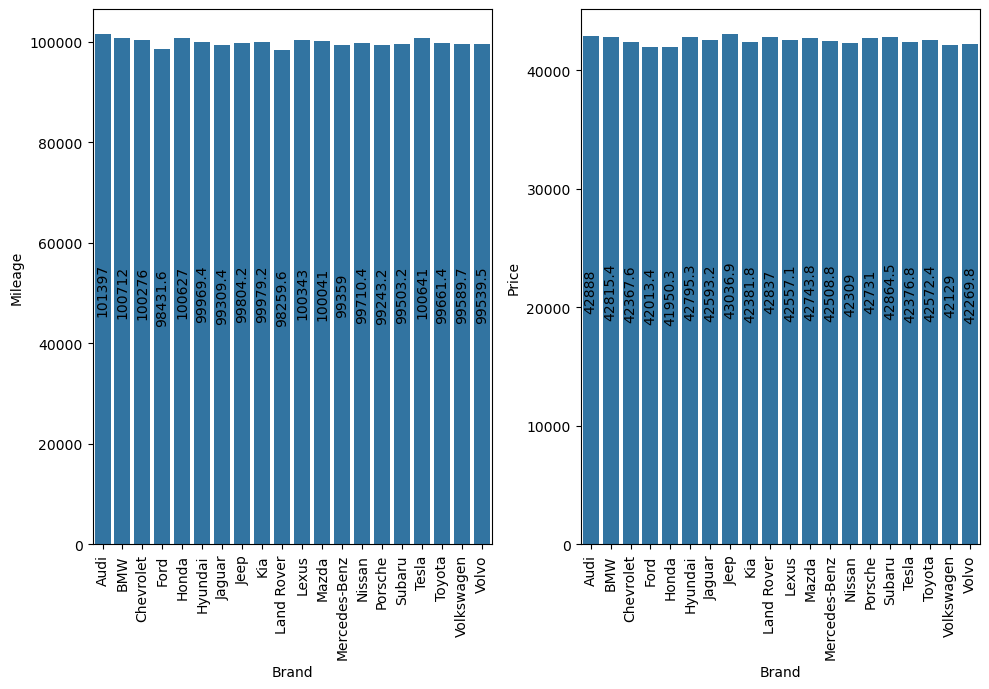

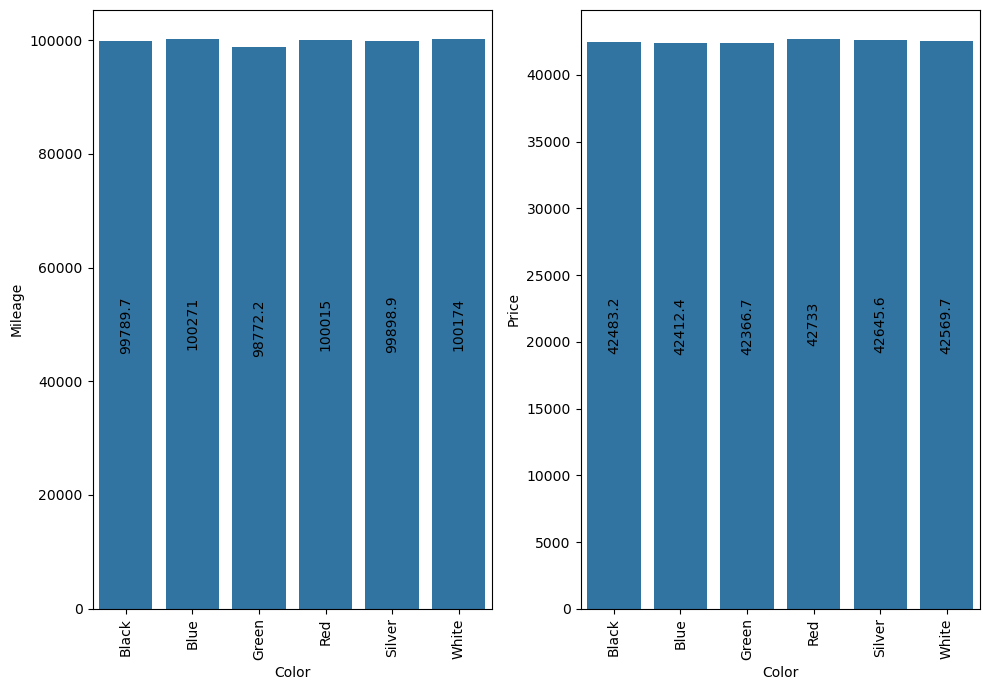

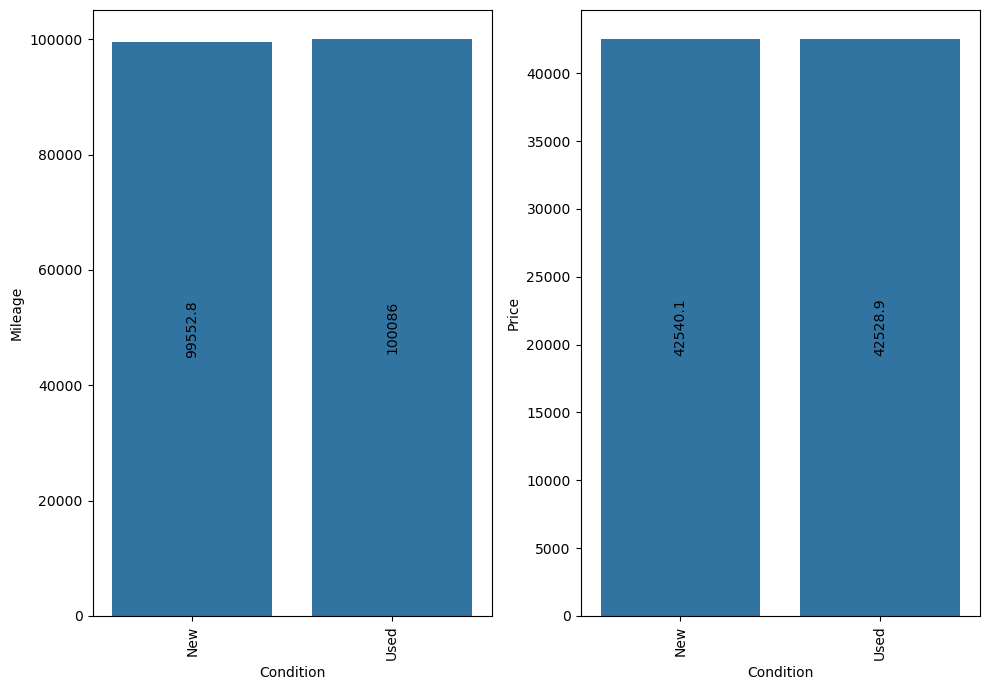

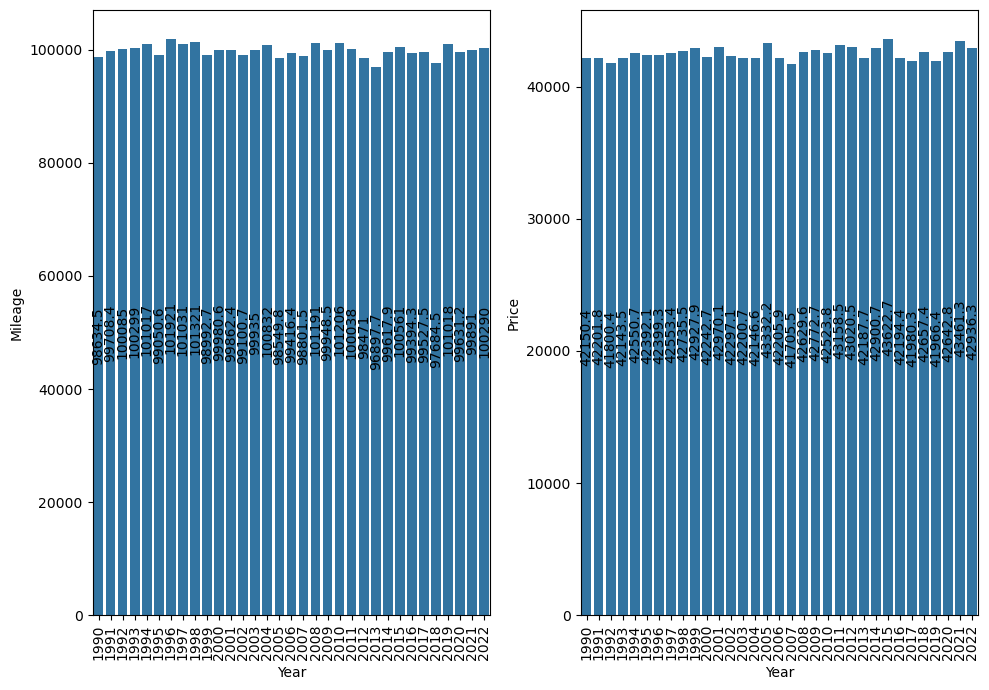

In [16]:
for i in cats + ["Year"]:
    if i != "Model":
        fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 7))
        plots(df, i, nums[0], axis[0])
        plots(df, i, nums[1], axis[1])
        plt.tight_layout()
        plt.show()

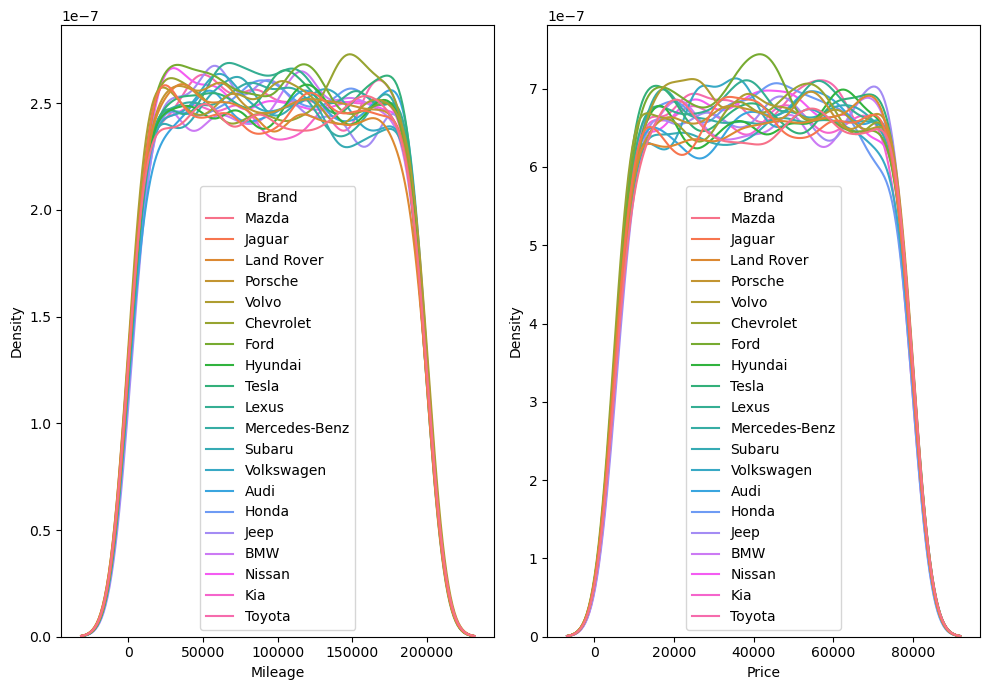

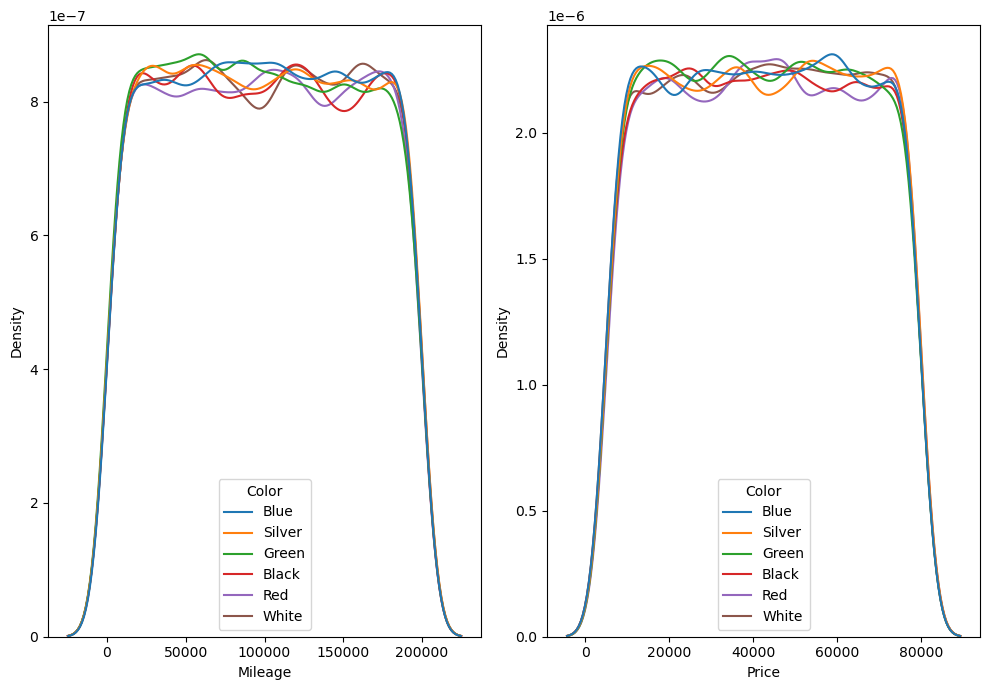

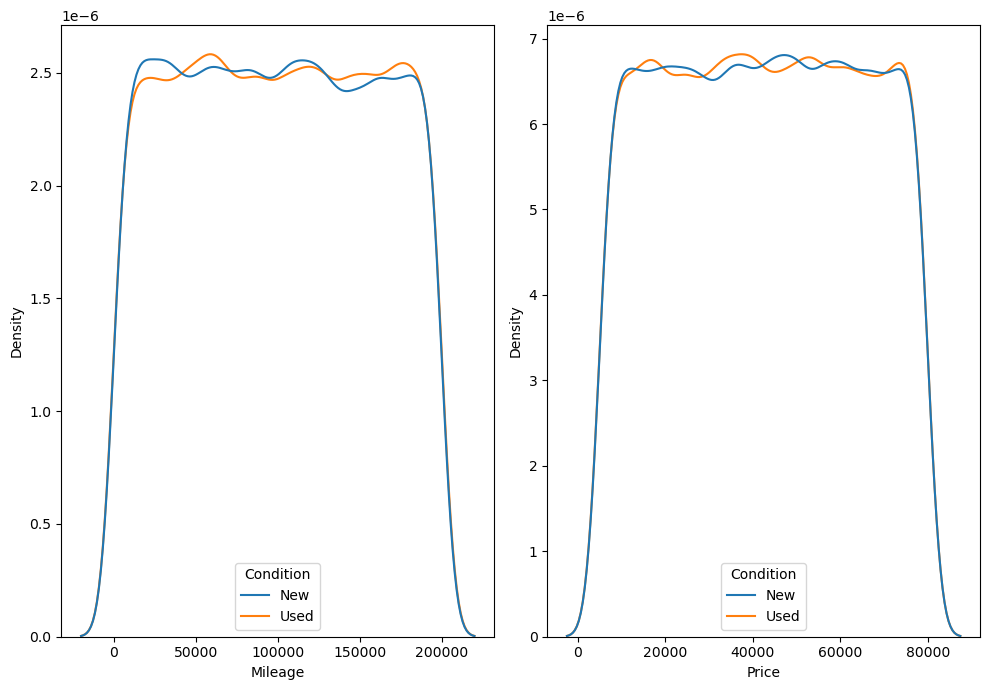

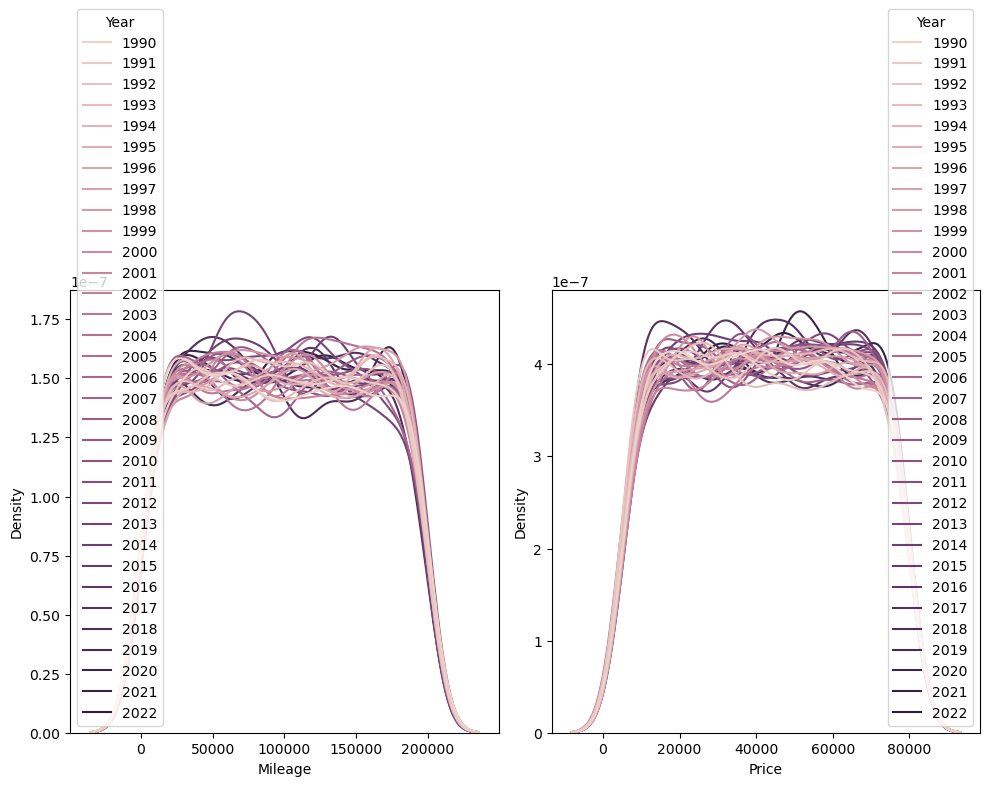

In [17]:
for i in cats+["Year"]:
    if i != "Model":
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
        sns.kdeplot(df, x=nums[0], hue=i, ax=axes[0])
        sns.kdeplot(df, x=nums[1], hue=i, ax=axes[1])
        plt.tight_layout()
        plt.show()

[Text(0, 0, 'Mazda'), Text(1, 0, 'Jaguar'), Text(2, 0, 'Land Rover'), Text(3, 0, 'Porsche'), Text(4, 0, 'Volvo'), Text(5, 0, 'Chevrolet'), Text(6, 0, 'Ford'), Text(7, 0, 'Hyundai'), Text(8, 0, 'Tesla'), Text(9, 0, 'Lexus'), Text(10, 0, 'Mercedes-Benz'), Text(11, 0, 'Subaru'), Text(12, 0, 'Volkswagen'), Text(13, 0, 'Audi'), Text(14, 0, 'Honda'), Text(15, 0, 'Jeep'), Text(16, 0, 'BMW'), Text(17, 0, 'Nissan'), Text(18, 0, 'Kia'), Text(19, 0, 'Toyota')]

[Text(0, 0, 'Mazda'), Text(1, 0, 'Jaguar'), Text(2, 0, 'Land Rover'), Text(3, 0, 'Porsche'), Text(4, 0, 'Volvo'), Text(5, 0, 'Chevrolet'), Text(6, 0, 'Ford'), Text(7, 0, 'Hyundai'), Text(8, 0, 'Tesla'), Text(9, 0, 'Lexus'), Text(10, 0, 'Mercedes-Benz'), Text(11, 0, 'Subaru'), Text(12, 0, 'Volkswagen'), Text(13, 0, 'Audi'), Text(14, 0, 'Honda'), Text(15, 0, 'Jeep'), Text(16, 0, 'BMW'), Text(17, 0, 'Nissan'), Text(18, 0, 'Kia'), Text(19, 0, 'Toyota')]


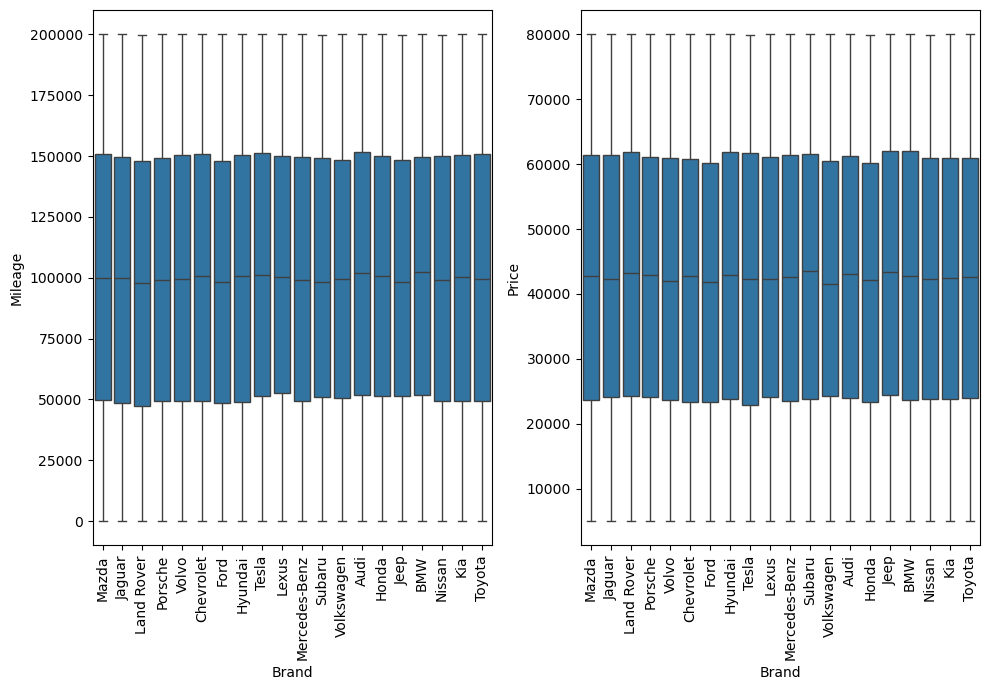

[Text(0, 0, 'Blue'), Text(1, 0, 'Silver'), Text(2, 0, 'Green'), Text(3, 0, 'Black'), Text(4, 0, 'Red'), Text(5, 0, 'White')]

[Text(0, 0, 'Blue'), Text(1, 0, 'Silver'), Text(2, 0, 'Green'), Text(3, 0, 'Black'), Text(4, 0, 'Red'), Text(5, 0, 'White')]


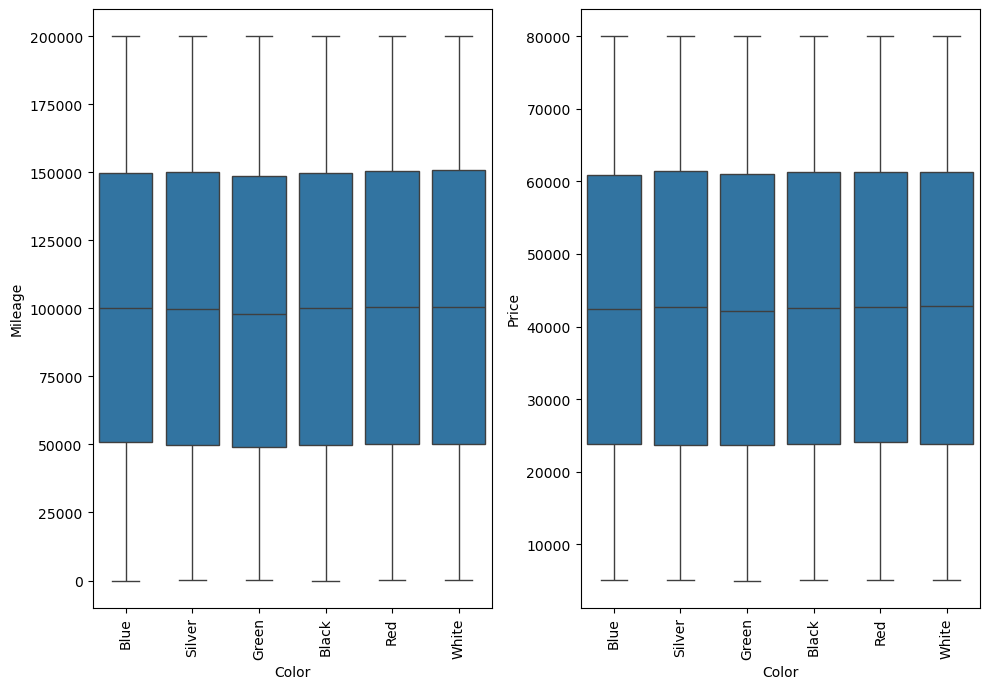

[Text(0, 0, 'New'), Text(1, 0, 'Used')]

[Text(0, 0, 'New'), Text(1, 0, 'Used')]


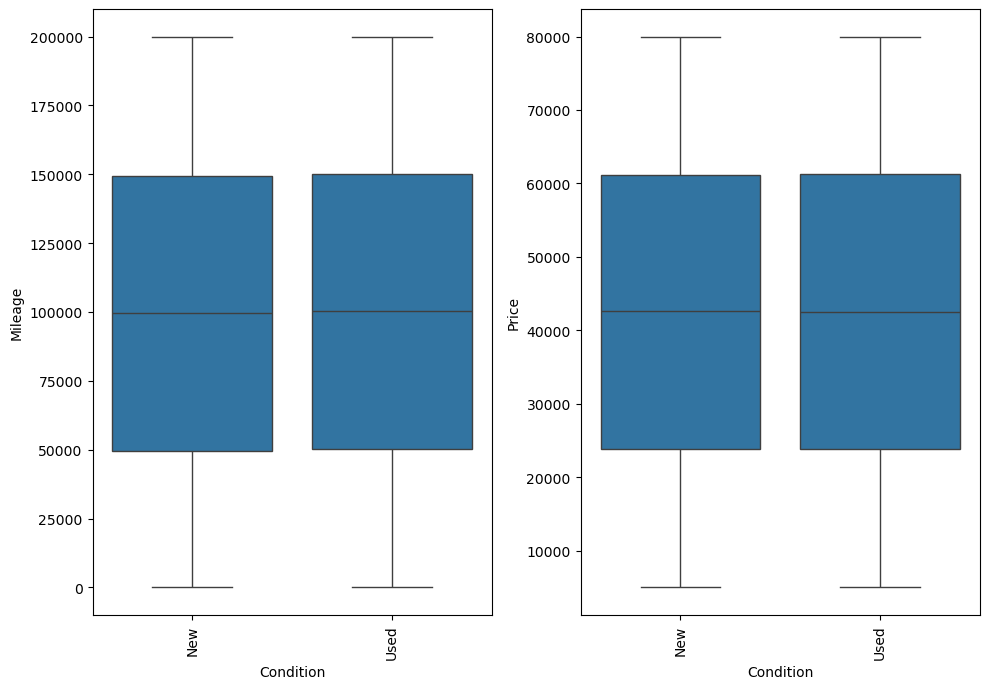

[Text(0, 0, '1990'), Text(1, 0, '1991'), Text(2, 0, '1992'), Text(3, 0, '1993'), Text(4, 0, '1994'), Text(5, 0, '1995'), Text(6, 0, '1996'), Text(7, 0, '1997'), Text(8, 0, '1998'), Text(9, 0, '1999'), Text(10, 0, '2000'), Text(11, 0, '2001'), Text(12, 0, '2002'), Text(13, 0, '2003'), Text(14, 0, '2004'), Text(15, 0, '2005'), Text(16, 0, '2006'), Text(17, 0, '2007'), Text(18, 0, '2008'), Text(19, 0, '2009'), Text(20, 0, '2010'), Text(21, 0, '2011'), Text(22, 0, '2012'), Text(23, 0, '2013'), Text(24, 0, '2014'), Text(25, 0, '2015'), Text(26, 0, '2016'), Text(27, 0, '2017'), Text(28, 0, '2018'), Text(29, 0, '2019'), Text(30, 0, '2020'), Text(31, 0, '2021'), Text(32, 0, '2022')]

[Text(0, 0, '1990'), Text(1, 0, '1991'), Text(2, 0, '1992'), Text(3, 0, '1993'), Text(4, 0, '1994'), Text(5, 0, '1995'), Text(6, 0, '1996'), Text(7, 0, '1997'), Text(8, 0, '1998'), Text(9, 0, '1999'), Text(10, 0, '2000'), Text(11, 0, '2001'), Text(12, 0, '2002'), Text(13, 0, '2003'), Text(14, 0, '2004'), Text(15, 

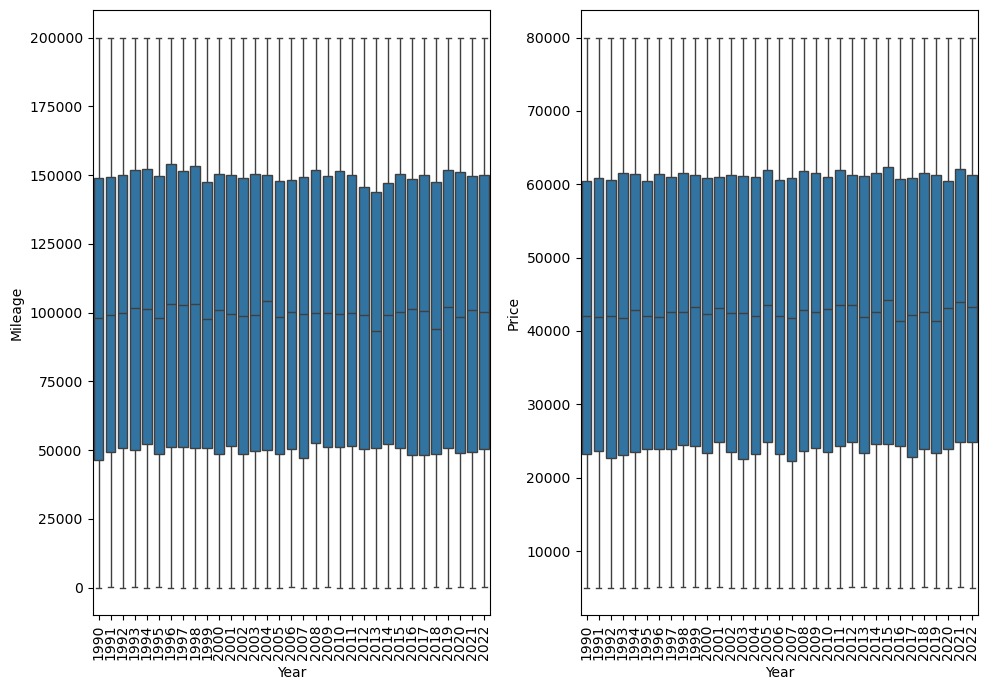

In [18]:
for i in cats+["Year"]:
    if i != "Model":
        fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 7))
        sns.boxplot(df, x = i, y = nums[0], ax = axis[0])
        sns.boxplot(df, x = i, y = nums[1], ax = axis[1])
        axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation = 90)
        x_tick_labels = axis[0].get_xticklabels()
        x_set_labels = axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation = 90)
        print(x_tick_labels)
        print()
        print(x_set_labels)
        axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation = 90)
        plt.tight_layout()
        plt.show()

In [19]:
x_tick_labels = axis[0].get_xticklabels()
x_tick_labels

[Text(0, 0, '1990'),
 Text(1, 0, '1991'),
 Text(2, 0, '1992'),
 Text(3, 0, '1993'),
 Text(4, 0, '1994'),
 Text(5, 0, '1995'),
 Text(6, 0, '1996'),
 Text(7, 0, '1997'),
 Text(8, 0, '1998'),
 Text(9, 0, '1999'),
 Text(10, 0, '2000'),
 Text(11, 0, '2001'),
 Text(12, 0, '2002'),
 Text(13, 0, '2003'),
 Text(14, 0, '2004'),
 Text(15, 0, '2005'),
 Text(16, 0, '2006'),
 Text(17, 0, '2007'),
 Text(18, 0, '2008'),
 Text(19, 0, '2009'),
 Text(20, 0, '2010'),
 Text(21, 0, '2011'),
 Text(22, 0, '2012'),
 Text(23, 0, '2013'),
 Text(24, 0, '2014'),
 Text(25, 0, '2015'),
 Text(26, 0, '2016'),
 Text(27, 0, '2017'),
 Text(28, 0, '2018'),
 Text(29, 0, '2019'),
 Text(30, 0, '2020'),
 Text(31, 0, '2021'),
 Text(32, 0, '2022')]

In [20]:
le = LabelEncoder()

for i in cats:
    if i != "Model":
        df[i] = le.fit_transform(df[i])

In [21]:
x = df.loc[:, ["Brand", "Year", "Color", "Mileage", "Price"]].values
y = df.loc[:, "Condition"].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
x

array([[0.57894737, 0.40625   , 0.2       , 0.11465229, 0.80976   ],
       [0.31578947, 0.40625   , 0.8       , 0.44968399, 0.71493333],
       [0.47368421, 1.        , 0.4       , 0.18307366, 0.60765333],
       ...,
       [0.47368421, 0.59375   , 1.        , 0.21155923, 0.54241333],
       [0.89473684, 0.625     , 1.        , 0.6049471 , 0.13446667],
       [0.94736842, 0.84375   , 0.2       , 0.69159383, 0.23821333]])

`MinMaxScaler` is a feature scaling technique provided by scikit-learn in the `sklearn.preprocessing` module. It is used to transform features by scaling them to a specified range, usually between 0 and 1. This scaling is achieved by applying the following formula to each feature independently:

\[ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]

where:
- \(X\) is the original feature value,
- \(X_{\text{min}}\) is the minimum value of the feature,
- \(X_{\text{max}}\) is the maximum value of the feature.

The purpose of `MinMaxScaler` is to bring all feature values into a specific range, making them comparable and preventing the dominance of features with larger scales. This can be particularly important for machine learning algorithms that are sensitive to the scale of features, such as gradient-based optimization algorithms.

### Usage Example:

```python
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data (e.g., training data)
X_scaled = scaler.fit_transform(X)
```

### Key Points:
- `fit_transform`: This method is used to both fit the scaler on the training data and transform the data. In practice, you often fit the scaler on the training data and use the same scaler to transform both the training and test data to ensure consistent scaling.
- `inverse_transform`: After scaling, you can use the `inverse_transform` method to revert the scaled values back to the original scale.

### When to Use:
- `MinMaxScaler` is suitable when your features have different ranges, and you want to normalize them to a common range, typically [0, 1].
- It is sensitive to outliers, as extreme values can disproportionately affect the scaling.

### Example Scenario:
- If you have features with different units or scales, such as age (0-100) and income (0-100,000), `MinMaxScaler` can bring both features to a common scale for modeling.

```python
# Example Usage
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# Create MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nScaled Data:")
print(scaled_data)
```

In this example, the `MinMaxScaler` scales the data to the range [0, 1] based on the minimum and maximum values in each feature.

In [23]:
def classification_training(model, name, ax):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    score = accuracy_score(y_test, y_preds)
    report = classification_report(y_test, y_preds)
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot = True, ax = ax)
    ax.set_title("{}: {}%".format(name, round(score*100, 2)))
    return report

In [55]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()
lgr = LogisticRegression()
gnb = GaussianNB()

models = [rfc, abc, etc, gbc, xgb, knn, lgr, gnb]
names = ["Random Forest", "Ada Boost", "Extra Trees",
        "Gradient Boosting", "XGB", "K-Nearest Neighbors",
        "Logistic Regression", "Naive Bayes"]

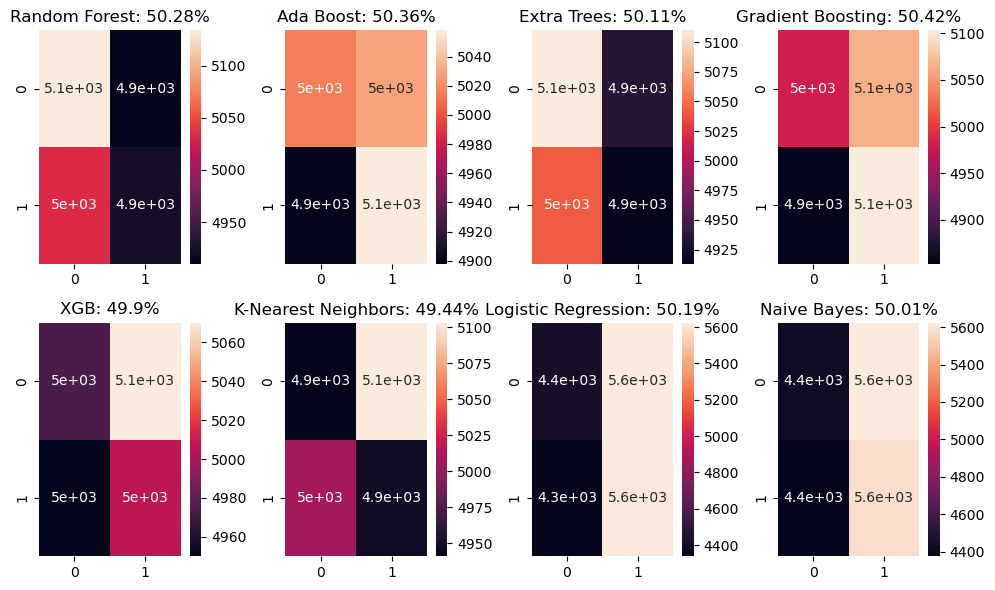

In [60]:
fig, axis = plt.subplots(nrows = 2, ncols = 4, figsize = (10, 6))
index = 0
reports = []
for i in range(2):
    for j in range(4):
        reports += [classification_training(models[index], names[index], axis[i][j])]
        index += 1
        
plt.tight_layout()
plt.show()

In [62]:
for i, j in zip(names, reports):
    print("*" * 50)
    print(i)
    print(j)
    print()

**************************************************
Random Forest
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10044
           1       0.50      0.49      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


**************************************************
Ada Boost
              precision    recall  f1-score   support

           0       0.51      0.50      0.50     10044
           1       0.50      0.51      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


**************************************************
Extra Trees
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10044
           1       0.50      0.49      0.50   